# Identity and Access Management (IAM) System Report

## Architecture Diagram
Below is a high-level architecture diagram of the IAM setup used in this project:

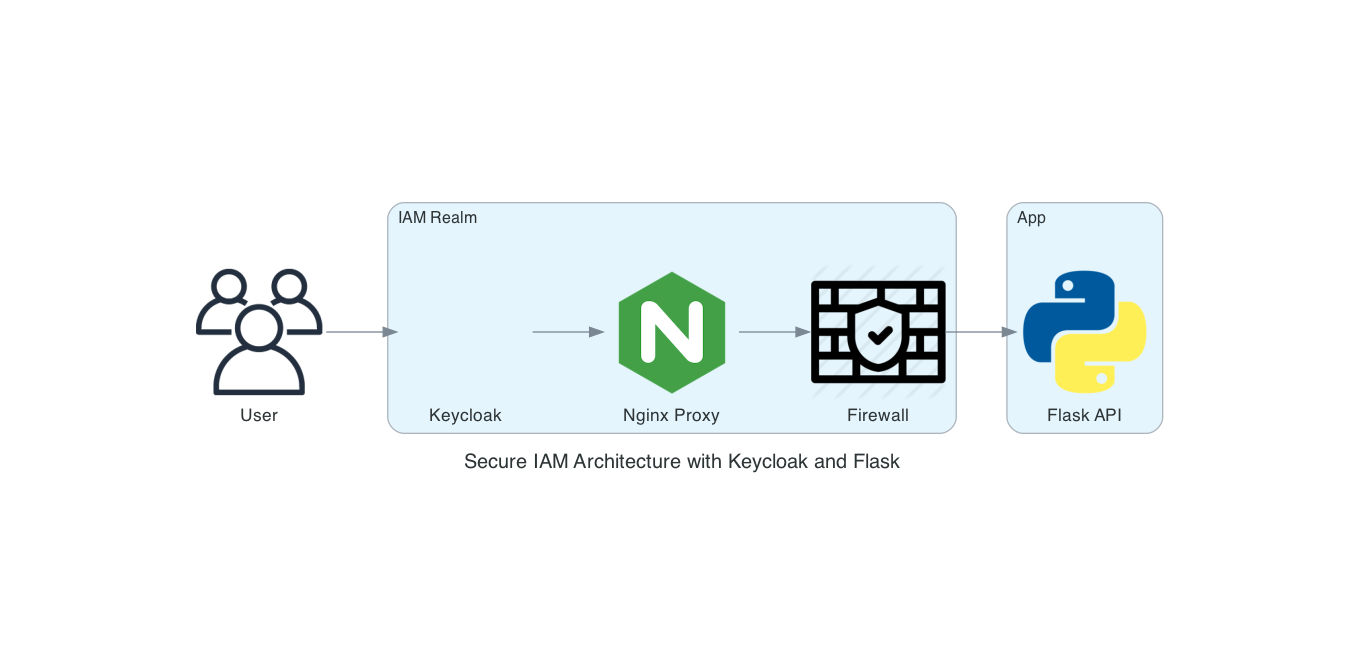

In [7]:
from diagrams import Cluster, Diagram
from diagrams.onprem.client import Users
from diagrams.onprem.network import Nginx
from diagrams.custom import Custom
from diagrams.programming.language import Python
from diagrams.generic.network import Firewall
from IPython.display import Image, display

# Define output path
output_path = "iam_architecture"

# Generate the diagram
with Diagram("Secure IAM Architecture with Keycloak and Flask", show=False, outformat="png", filename=output_path):
    user = Users("User")

    with Cluster("IAM Realm"):
        keycloak = Custom("Keycloak", "./resources/onprem/identity/keycloak.png")
        nginx = Nginx("Nginx Proxy")
        firewall = Firewall("Firewall")

    with Cluster("App"):
        flask = Python("Flask API")

    user >> keycloak
    keycloak >> nginx >> firewall >> flask

# Display the image below the code cell
display(Image(filename=f"{output_path}.png"))


## OAuth 2.0 and OIDC Flow

This project uses the **Resource Owner Password Credentials** (ROPC) flow of OAuth 2.0 with OpenID Connect (OIDC) via Keycloak as the Identity Provider (IdP). 

Here's a simplified step-by-step overview:

1. **User Authentication**: The client sends a `POST` request to Keycloak’s token endpoint with the username and password.
2. **Token Retrieval**: If the credentials are valid, Keycloak responds with an access token (and optionally an ID token).
3. **Token Usage**: The client uses this access token to call the protected Flask endpoint.
4. **Token Verification**: The Flask application verifies the token using the public JWKS endpoint provided by Keycloak.

This allows seamless, stateless authentication across microservices without maintaining sessions.


## Threat Modeling (STRIDE)

In [4]:
!python3 -m ensurepip --upgrade

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 


## Reflection on Okta Case Study

The breach of Okta's support systems in early 2022 highlighted the risks of third-party access and minimal privilege. This influenced our architecture design to:

- **Limit Token Lifetimes**: Short-lived tokens reduce risk from token theft.
- **Use Scoped Access Tokens**: Ensure tokens are limited in their permissions.
- **Audit Third-Party Integrations**: Validate and log all third-party activities.
- **Zero Trust Principles**: Assume no actor is trusted by default, even inside the network.

These considerations strengthen the overall security posture of our IAM setup.
